In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy import stats

In [2]:
# from pandas_gbq import read_gbq

# from google.cloud import bigquery
# from google.oauth2 import service_account


# KEY = "big-files/idyllic-tendril-421208-5bc1941f7008.json"

# credentials = service_account.Credentials.from_service_account_file(KEY)

# client = bigquery.Client(credentials=credentials, project=credentials.project_id)

# table_id = 'bigquery-public-data.crypto_ethereum.transactions'

# query = f"""
# SELECT gas, max_fee_per_gas, max_priority_fee_per_gas, receipt_effective_gas_price, gas_price, block_timestamp
# FROM `{table_id}`
# LIMIT 100000
# """

# data = read_gbq(query, project_id=credentials.project_id, credentials=credentials)

# data.to_csv("transactions100000.csv")

In [3]:
TRAIN_DIRECTORY = "big-files/transactions100000.csv"

# 1. Data Exploration and Preprocessing

### 1.1 Loading the Dataset and Understanding its Structure

In [4]:
# Load the data
data = pd.read_csv(TRAIN_DIRECTORY)
data

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,...,block_number,block_hash,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,receipt_effective_gas_price,max_fee_per_blob_gas,blob_versioned_hashes,receipt_blob_gas_price,receipt_blob_gas_used
0,0xe762dd92f7a7bc16ee47188c4a2dfedc28202dad13c4...,57077,148,0xa83114a443da1cecefc50368531cace9f37fcccb,0x4675c7e5baafbffbca748158becba61ef3b0a263,2.027349e+17,21000,2357096623,0x,15889746,...,20390203,0x50251abb442a34c796c7d04515c5c5168eca258b0f64...,2.357097e+09,0.000000e+00,2,2357096623,NaN,[],NaN,NaN
1,0x90cbf1652e6b93adff4b155bf843f59ecfb239c06340...,90,113,0xeb549edf318fcbbed23cb3dd2323449e401ebd3c,0xde8f22fbc53add5da02cf75616ac8f1eeda07c68,4.390000e+18,21000,2648096623,0x,13441387,...,20390203,0x50251abb442a34c796c7d04515c5c5168eca258b0f64...,3.817832e+09,2.910000e+08,2,2648096623,NaN,[],NaN,NaN
2,0x58ce377546086d72e6a9ee83b9a2c09d820159e35b9e...,28,16,0x1225c2590a335b5dc20a67a07cf045245f463a4a,0xa5f565650890fba1824ee0f21ebbbf660a179934,7.798510e+14,49369,3847018376,0x02777bd5,921021,...,20390204,0x78fb6920b2a3d2578d9ba84be279f01a136f27e513f5...,3.873482e+09,1.472445e+09,2,3847018376,NaN,[],NaN,NaN
3,0x2ebff83a86344dc821152c7be90ca36cca1cb1ecb042...,375,49,0xa0a93347c540860d2ffc4891906cd1b8c2ccb921,0xd37bbe5744d730a1d98d8dc97c42f0ca46ad7146,0.000000e+00,450000,4139045669,0x1b738b32000000000000000000000000d37bbe5744d7...,5412686,...,20390205,0x3dce7866de8d6bcbe2cf2decf41eeb9fa73880394f93...,1.000000e+10,2.000000e+09,2,4139045669,NaN,[],NaN,NaN
4,0x45c1a3de70daccd2f2d767d89a3b60887444fcd8abbf...,0,9,0x0c9fdef04b350820c035174e7f755de7af169fc0,0x077d360f11d220e4d5d831430c81c26c9be7c4a4,1.563463e+16,22000,3000000000,0x,1384059,...,20390205,0x3dce7866de8d6bcbe2cf2decf41eeb9fa73880394f93...,NaN,NaN,0,3000000000,NaN,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x056ad81d0edbb64521b011d9e5d0d4188f6416f47886...,98,94,0xcee4011e2e90d65a94b2ac5ed596c9834a607767,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,0.000000e+00,241011,2842724744,0x3593564c000000000000000000000000000000000000...,8325646,...,20302100,0x81d87f650570e14f6ccb94446142e5de15b010bc400e...,3.453106e+09,9.700000e+08,2,2842724744,NaN,[],NaN,NaN
99996,0x6b321aecf9f7b7fdebba7850a6c499e6b14245d75974...,127,6,0x3a0e3aa2524adff222a57aa611fd62a31065ad34,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0.000000e+00,315324,8967031119,0x791ac947000000000000000000000000000000000000...,1128992,...,20302101,0xa2b5cd7d9ffab6f1911449d3798f01063612c6e62d19...,1.457000e+10,7.140000e+09,2,8967031119,NaN,[],NaN,NaN
99997,0x9d326ec513a7ac96eb7ed54d32ba556b916be5a51cd2...,5,140,0x1db430f53d164e5a1fb431d66b7c2589b5a155c3,0xdac17f958d2ee523a2206206994597c13d831ec7,0.000000e+00,63507,1828031119,0xa9059cbb000000000000000000000000500b81835128...,16451783,...,20302101,0xa2b5cd7d9ffab6f1911449d3798f01063612c6e62d19...,2.157093e+09,1.000000e+06,2,1828031119,NaN,[],NaN,NaN
99998,0x38fc31f95e0322c1ff38be61a0f775b028d600d9a5d7...,11,124,0x806633d9d0c353802a5309885ded1aa6f6e0e2e6,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,0.000000e+00,274021,1828031119,0x3593564c000000000000000000000000000000000000...,14563342,...,20302101,0xa2b5cd7d9ffab6f1911449d3798f01063612c6e62d19...,2.009208e+09,1.000000e+06,2,1828031119,NaN,[],NaN,NaN


In [5]:
# | **Column Name**                    | **Description**                                                                                               |
# |------------------------------------|---------------------------------------------------------------------------------------------------------------|
# | 7. `gas`                           | The maximum amount of gas that the sender is willing to pay for the transaction to be executed.               |
# | 8. `gas_price`                     | The price per unit of gas in Wei that the sender is willing to pay.                                           |
# | 15. `block_timestamp`              | The timestamp of the block, indicating when the block was mined.                                              |
# | 18. `max_fee_per_gas`              | The maximum fee per unit of gas that the sender is willing to pay (includes both base fee and priority fee).  |
# | 19. `max_priority_fee_per_gas`     | The maximum priority fee per unit of gas that the sender is willing to pay to expedite the transaction.       |
# | 21. `receipt_effective_gas_price`  | The effective gas price paid for the transaction, taking into account the current base fee and priority fee.  |


In [6]:
# We analyze and understand that we only need 6 columns
df = data[["gas", "max_fee_per_gas", "max_priority_fee_per_gas", "receipt_effective_gas_price", "block_timestamp", "gas_price",]]

In [7]:
# View the first few rows
df.head()

,gas,max_fee_per_gas,max_priority_fee_per_gas,receipt_effective_gas_price,block_timestamp,gas_price
0,21000,2.357097e+09,0.000000e+00,2357096623,2024-07-26 10:43:35+00:00,2357096623
1,21000,3.817832e+09,2.910000e+08,2648096623,2024-07-26 10:43:35+00:00,2648096623
2,49369,3.873482e+09,1.472445e+09,3847018376,2024-07-26 10:43:47+00:00,3847018376
3,450000,1.000000e+10,2.000000e+09,4139045669,2024-07-26 10:43:59+00:00,4139045669
4,22000,NaN,NaN,3000000000,2024-07-26 10:43:59+00:00,3000000000


In [8]:
# We see information about the dimension of our dataframe
df.shape 

(100000, 6)

In [9]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   gas                          100000 non-null  int64  
 1   max_fee_per_gas              95858 non-null   float64
 2   max_priority_fee_per_gas     95858 non-null   float64
 3   receipt_effective_gas_price  100000 non-null  int64  
 4   block_timestamp              100000 non-null  object 
 5   gas_price                    100000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 4.6+ MB


In [10]:
# Statistics for numerical data
df.describe()

,gas,max_fee_per_gas,max_priority_fee_per_gas,receipt_effective_gas_price,gas_price
count,1.000000e+05,9.585800e+04,9.585800e+04,1.000000e+05,1.000000e+05
mean,2.370734e+05,2.164203e+10,3.070349e+09,1.025560e+10,1.025560e+10
std,7.228919e+05,9.435149e+10,6.978934e+10,6.849728e+10,6.849728e+10
min,2.100000e+04,1.258426e+09,0.000000e+00,1.258426e+09,1.258426e+09
25%,3.180600e+04,4.453688e+09,4.703962e+07,3.320239e+09,3.320239e+09
50%,9.456100e+04,1.148593e+10,5.000000e+08,6.339680e+09,6.339680e+09
75%,2.445075e+05,1.879395e+10,2.000000e+09,1.271655e+10,1.271655e+10
max,2.850000e+07,2.001124e+13,2.000000e+13,2.001124e+13,2.001124e+13


In [11]:
# the number of unique values for each column
df.nunique() 

gas                            36617
max_fee_per_gas                51233
max_priority_fee_per_gas       14174
receipt_effective_gas_price    54029
block_timestamp                 6328
gas_price                      54029
dtype: int64

Our code performs a number of tasks to explore the source data. It provides a brief overview of a dataset by displaying the first few rows, analyzing its size and structure, generating descriptive statistics for numerical characteristics, and determining the number of unique values in each column. As we can see, we have huge numbers and there are also missing data.

### 1.2. Perform basic data cleaning, including handling missing values and removing duplicates

In [12]:
# Check for missing values
df.isnull().sum()

gas                               0
max_fee_per_gas                4142
max_priority_fee_per_gas       4142
receipt_effective_gas_price       0
block_timestamp                   0
gas_price                         0
dtype: int64

In [13]:
# Check for duplicates and non-dublicates
df.duplicated().value_counts()

False    92297
True      7703
Name: count, dtype: int64

In [14]:
# Remove duplicates
df = df.drop_duplicates()

In [15]:
# replacing all missing values with mean values
numeric_columns = df.select_dtypes(include=[np.number]).columns # select only numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [16]:
# Rename block_timestamp in date
df = df.rename(columns={"block_timestamp": "date"}) 
# Rename gas in gas_Value
df = df.rename(columns={"gas": "gas_value"}) 

In [17]:
# Converting a date to a normal format
df["date"] = pd.to_datetime(df["date"])

In [18]:
# Lets make sure that the conversion was successful
df["date"].head(3)

0   2024-07-26 10:43:35+00:00
1   2024-07-26 10:43:35+00:00
2   2024-07-26 10:43:47+00:00
Name: date, dtype: datetime64[ns, UTC]

In [19]:
# Transformation wei in gwei. So that everything is in the same currency
def wei_to_gwei(wei):
    return wei / 1e9

In [20]:
# We apply the conversion to the columns so that everything is in the same price format and one type
df["max_fee_per_gas"] = df["max_fee_per_gas"].apply(wei_to_gwei).astype(float)
df["max_priority_fee_per_gas"] = df["max_priority_fee_per_gas"].apply(wei_to_gwei).astype(float)
df["receipt_effective_gas_price"] = df["receipt_effective_gas_price"].apply(wei_to_gwei).astype(float)

Renaming and converting all columns to the correct types allows you to improve readability and continue working with columns. As for the currency, it is better to convert the entire currency to one type in order to prevent the appearance of numbers such as 4.703962e+07

In [21]:
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns

# set for indexes
anomal_indices = set()

for column in numerical_columns:
    z_scores = stats.zscore(df[column])
    column_anomalies = df[abs(z_scores) > 3].index
    anomal_indices.update(column_anomalies)

# Removing rows with anomalies from df
df.drop(anomal_indices, inplace=True)

# len 
len(anomal_indices)

1739

Anomaly detection is crucial in machine learning for maintaining data quality by identifying and removing errors or outliers that could distort analysis. It helps improve the accuracy and reliability of models by ensuring that the data used for training and evaluation is clean and representative of typical conditions. By detecting deviations from expected patterns, anomaly detection also supports robust decision-making and enhances the overall performance of machine learning systems.

In [22]:
# Create label. label = y
label = df.loc[:, "gas_price"].apply(wei_to_gwei).astype(float)

In [23]:
# Making sure that the indexes in df and label match
df, label = df.align(label, join="inner", axis=0)

### 1.3. Generate summary statistics and visualize the distributions of key features

In [24]:
# Key features
key_features = ["gas_value", "max_fee_per_gas", "max_priority_fee_per_gas", "receipt_effective_gas_price", "gas_price"]

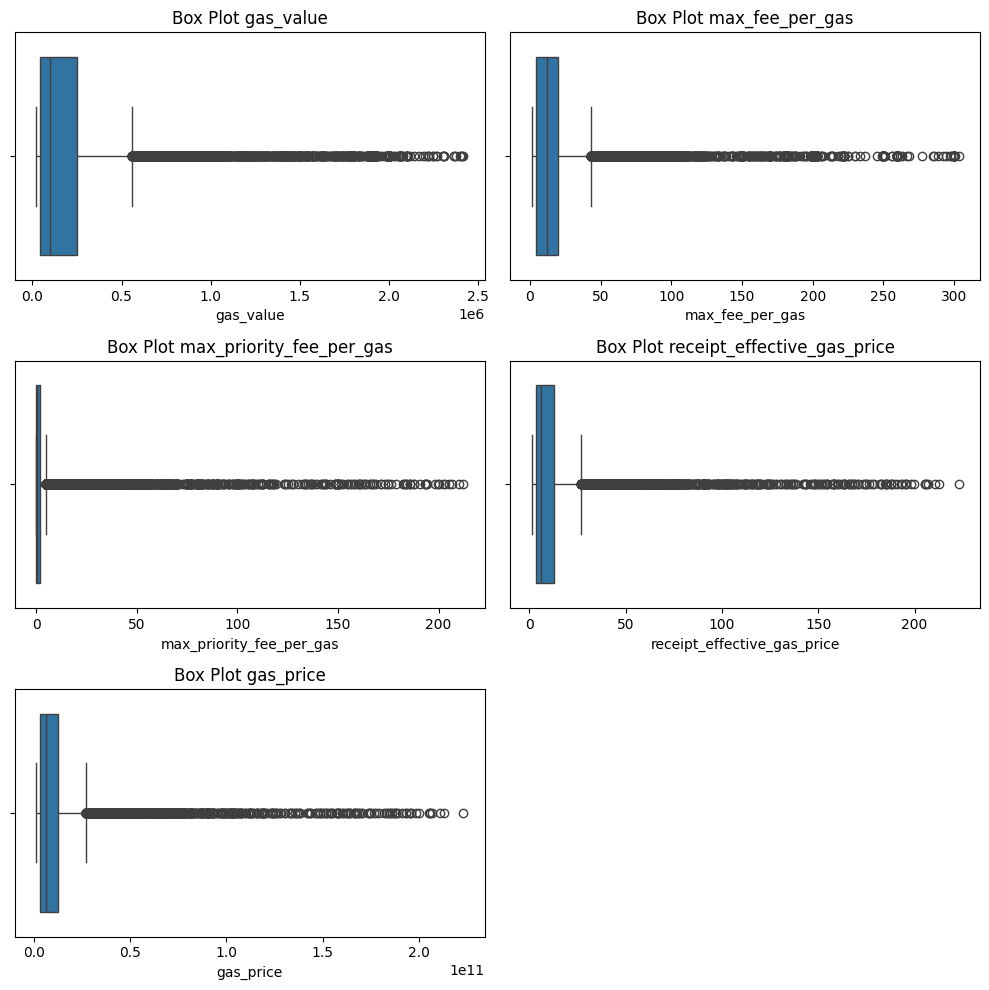

In [25]:
# Boxplot for key features
plt.figure(figsize=(10, 10))

for i, feature in enumerate(key_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[feature])
    plt.title(f"Box Plot {feature}")
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In general, after clearing the data, you observe a normalized distribution of indicators, which should more accurately reflect real trends and variations in gas consumption and related costs.

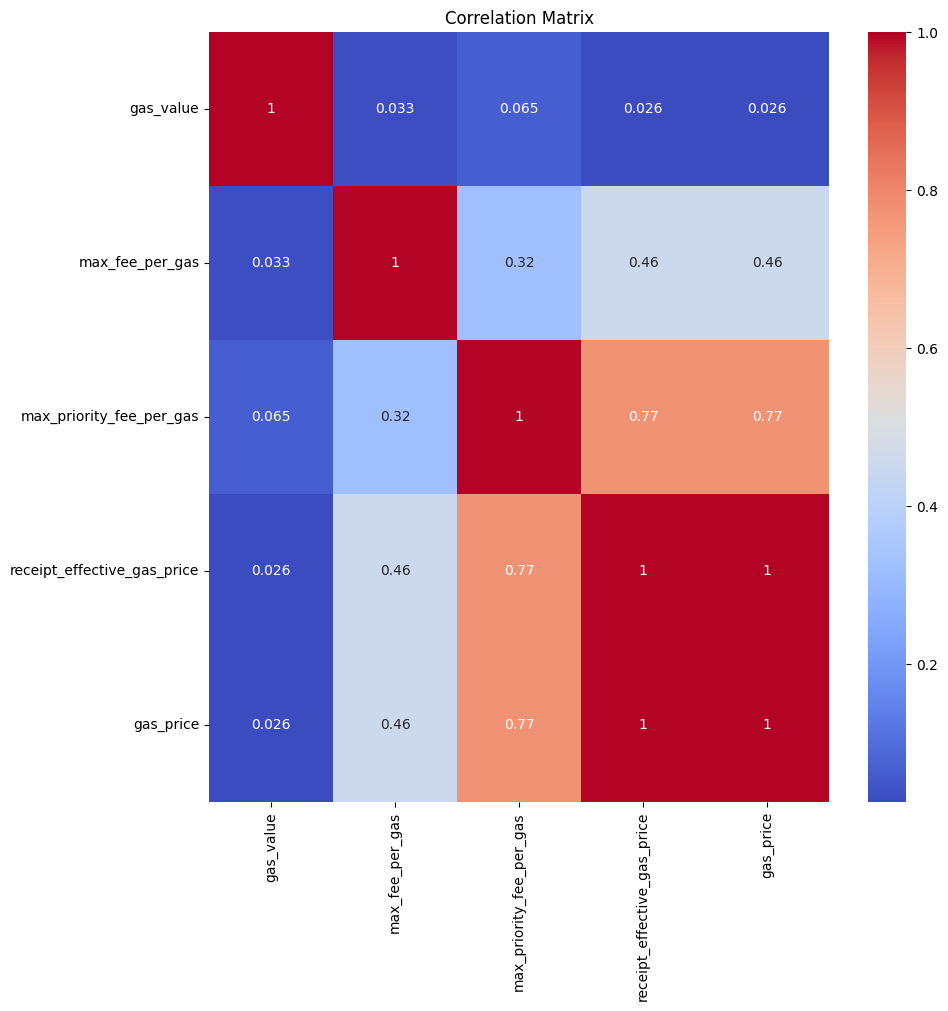

In [26]:
# Correlation matrix
plt.figure(figsize=(10, 10))
correlation_matrix = df[key_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Conclusion:
**_max_priority_fee_per_gas_** and **_receipt_effective_gas_price_**, as well as **_gas_price_**, show a high correlation with each other. This may indicate that these variables are related and likely change together.

**_max_fee_per_gas_** has a weak positive correlation with other variables, but the relationship is not strong.

**_gas_value_** has a very weak connection with other variables, indicating that changes in **_gas_value_** have little to no effect on other variables in your dataset.


# 2. Feature Engineering

### 2.1. Create new features that may be useful for predicting gas prices

- Gas prices may depend on the time of day due to changes in user activity. Gas is usually cheaper at night than during the day. 
- It is used more on weekdays.
- In the winter months, it is consumed more.

In [27]:
# Adding weights for hours, day, day of month and month weigth. + i add months weigth because assuming higher gas prices in winter. 
df["hour"] = df["date"].dt.hour
df["day_of_week"] = df["date"].dt.dayofweek
df["day_of_month"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["month_weight"] = np.where(df["month"].isin([12, 1, 2]), 1.5, 1) # Normal month 1 - in winter 1.5

In [28]:
# Deleting unnecessary columns
df = df.drop(["date", "gas_price"], axis=1)

In [29]:
df

,gas_value,max_fee_per_gas,max_priority_fee_per_gas,receipt_effective_gas_price,hour,day_of_week,day_of_month,month,month_weight
0,21000,2.357097,0.000000,2.357097,10,4,26,7,1.0
1,21000,3.817832,0.291000,2.648097,10,4,26,7,1.0
2,49369,3.873482,1.472445,3.847018,10,4,26,7,1.0
3,450000,10.000000,2.000000,4.139046,10,4,26,7,1.0
4,22000,21.012756,3.196411,3.000000,10,4,26,7,1.0
...,...,...,...,...,...,...,...,...,...
99995,241011,3.453106,0.970000,2.842725,3,6,14,7,1.0
99996,315324,14.570000,7.140000,8.967031,3,6,14,7,1.0
99997,63507,2.157093,0.001000,1.828031,3,6,14,7,1.0
99998,274021,2.009208,0.001000,1.828031,3,6,14,7,1.0


# 3. Model Building and Training

### 3.1 Split the dataset into training and test sets.

The data were divided into training (60%), validation (20%) and test (20%) samples:

In [30]:
# Split the dataset into training and test sets
x_train, x_temp, y_train, y_temp = train_test_split(df, label, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, train_size=0.5, random_state=42)

In [31]:
len(x_train)

54334

### 3.2 Normalize or standardize features if necessary.

In [32]:
# Normalization and standardization of data
numerical_columns = numerical_columns = ["gas_value", "max_fee_per_gas", "max_priority_fee_per_gas", "receipt_effective_gas_price", 
                     "hour", "day_of_week", "day_of_month", "month", "month_weight"]

scaler_minmax = MinMaxScaler()
x_train[numerical_columns] = scaler_minmax.fit_transform(x_train[numerical_columns])
x_val[numerical_columns] = scaler_minmax.transform(x_val[numerical_columns])
x_test[numerical_columns] = scaler_minmax.transform(x_test[numerical_columns])

scaler = StandardScaler()
x_train[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])
x_val[numerical_columns] = scaler.transform(x_val[numerical_columns])
x_test[numerical_columns] = scaler.transform(x_test[numerical_columns])



### 3.3 Use cross-validation to tune hyperparameters for each model. 
### Train at least three different models (one of these models to be a neural network) to predict the gas price.

In [33]:
# 1. RandomForestRegressor hyperparameter tuning
rf_model = RandomForestRegressor()

rf_param_dist = {
    "n_estimators": [50, 100, 200],  # Number of trees in the forest
    "max_depth": [None, 10, 20],     # Maximum depth of each tree
    "min_samples_split": [2, 5, 10]  # Minimum samples required to split a node
}

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,             # Model to be tuned
    param_distributions=rf_param_dist,  # Hyperparameter grid
    n_iter=10,                      # Number of parameter settings to sample
    cv=5,                          # Number of folds for cross-validation
    scoring="neg_mean_squared_error",   # Evaluation metric
    verbose=1,                     # Level of verbosity
    random_state=42                # Random seed
)

random_search_rf.fit(x_train, y_train)
best_rf_model = random_search_rf.best_estimator_

# Evaluate RandomForestRegressor on validation data
rf_val_predictions = best_rf_model.predict(x_val)

rf_val_rmse = root_mean_squared_error(y_val, rf_val_predictions)
rf_val_r2 = r2_score(y_val, rf_val_predictions)
rf_val_mse = mean_squared_error(y_val, rf_val_predictions)
rf_val_mae = mean_absolute_error(y_val, rf_val_predictions)
rf_val_mape = mean_absolute_percentage_error(y_val, rf_val_predictions)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


<b>Why use ridge regression instead of linear regression? 

Ridge regression—also known as L2 regularization—is one of several types of regularization for linear regression models. 

Regularization is a statistical method to reduce errors caused by overfitting on training data</b>

In [34]:
# 2. Ridge Regression hyperparameter tuning
ridge_model = Ridge()

ridge_param_dist = {
    'alpha': uniform(0.1, 10)  # Regularization strength
}

# Initialize RandomizedSearchCV for Ridge Regression
random_search_ridge = RandomizedSearchCV(
    estimator=ridge_model,               # Model to be tuned
    param_distributions=ridge_param_dist,   # Parameter grid
    n_iter=10,                          # Number of parameter settings to sample
    cv=5,                              # Number of folds for cross-validation
    scoring="neg_mean_squared_error",   # Evaluation metric
    verbose=1,                         # Level of verbosity
    random_state=42                    # Random seed
)

random_search_ridge.fit(x_train, y_train)
best_ridge_model = random_search_ridge.best_estimator_

# Evaluate Ridge Regression on validation data
ridge_val_predictions = best_ridge_model.predict(x_val)

ridge_val_rmse = root_mean_squared_error(y_val, ridge_val_predictions)
ridge_val_r2 = r2_score(y_val, ridge_val_predictions)
ridge_val_mse = mean_squared_error(y_val, ridge_val_predictions)
ridge_val_mae = mean_absolute_error(y_val, ridge_val_predictions)
ridge_val_mape = mean_absolute_percentage_error(y_val, ridge_val_predictions)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


<h3>There is no direct cross-validation method for neural networks using Keras/TensorFlow, 

but we will use the EarlyStopping and ReduceLROnPlateau function to monitor and stop learning during retraining.

In [35]:
# 3. Neural Network Model
neural_model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(64, activation="relu"),
    Dense(1)
])

learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss",  # Monitor validation loss
                                            patience=3,  # Wait 3 epochs before reducing LR
                                            verbose=1,  # Print message when reducing LR
                                            factor=0.4,  # Reduce LR by 40%
                                            min_lr=0.00001)  # Minimum LR value

earlystop = EarlyStopping(monitor="val_loss",  # Monitor validation loss
                          patience=5,  # Stop after 5 epochs without improvement
                          restore_best_weights=True)  # Restore best weights
    
callbacks = [earlystop, learning_rate_reduction]

neural_model.compile(optimizer="adam", loss="mean_absolute_error")

neural_model.fit(
    x_train, y_train,                     # Training data
    epochs=50,                           # Number of epochs
    batch_size=64,                       # Batch size
    validation_data=(x_val, y_val),      # Validation data
    callbacks=callbacks                  # Callbacks for early stopping and learning rate reduction
)

# Evaluate Neural Network on validation data
nm_val_predictions = neural_model.predict(x_val)

nm_val_rmse = root_mean_squared_error(y_val, nm_val_predictions)
nm_val_r2 = r2_score(y_val, nm_val_predictions)
nm_val_mse = mean_squared_error(y_val, nm_val_predictions)
nm_val_mae = mean_absolute_error(y_val, nm_val_predictions)
nm_val_mape = mean_absolute_percentage_error(y_val, nm_val_predictions)



Epoch 1/50
849/849 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - loss: 4.0138 - val_loss: 0.3773 - learning_rate: 0.0010
Epoch 2/50
849/849 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - loss: 0.2380 - val_loss: 0.0930 - learning_rate: 0.0010
Epoch 3/50
849/849 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - loss: 0.0692 - val_loss: 0.0286 - learning_rate: 0.0010
Epoch 4/50
849/849 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - loss: 0.0309 - val_loss: 0.0235 - learning_rate: 0.0010
Epoch 5/50
849/849 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - loss: 0.0246 - val_loss: 0.0195 - learning_rate: 0.0010
Epoch 6/50
849/849 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - loss: 0.0210 - val_loss: 0.0197 - learning_rate: 0.0010
Epoch 7/50
849/849 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - loss: 0.0208 - val_loss: 0.0153 - learning_rate: 0.0010
Epoch 8/50
849/849 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - loss: 0.0187 - val_loss: 0.0172 - learning_rate: 0.0010
Epoch 9/50
849/849 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step - loss: 0.0177 - val_loss: 0.0134 - learning_rate:

In [36]:
# Validation results
validation_results = {
    "Model": ["Random Forest", "Ridge Regression", "Neural Network"],
    "Validation RMSE": [rf_val_rmse, ridge_val_rmse, nm_val_rmse],
    "Validation R²": [rf_val_r2, ridge_val_r2, nm_val_r2],
    "Validation MSE": [rf_val_mse, ridge_val_mse, nm_val_mse],
    "Validation MAE": [rf_val_mae, ridge_val_mae, nm_val_mae],
    "Validation MAPE": [rf_val_mape, ridge_val_mape, nm_val_mape]
}

validation_df = pd.DataFrame(validation_results)

validation_df.round(6)

,Model,Validation RMSE,Validation R²,Validation MSE,Validation MAE,Validation MAPE
0,Random Forest,0.092743,0.999912,0.008601,0.006533,0.000482
1,Ridge Regression,0.000460,1.000000,0.000000,0.000237,0.000034
2,Neural Network,0.028768,0.999992,0.000828,0.005115,0.000567


Conclusion:
The Ridge regression model was optimized using Randomized Search C V, which made it possible to select the best hyperparameters. After that, the model was evaluated on validation data, and the results include important metrics such as RMSE, R2, MSE, MAE, and MAPE. These metrics provide information about the accuracy of the model and its ability to make predictions based on validation data.

<b>Ridge Regression</b> shows the best performance on all metrics: it has the lowest values of RMSE, MAE, MAE and MAPE, 
and an ideal value of R2, which indicates high accuracy and excellent compliance of the model with the data.
<b>Neural Network</b> and <b>Random Forest</b> also show good results, but their metrics show a slightly larger error compared to Ridge Regression.

# 4. Model Evaluation and Selection

### 4.1 Evaluation

In [37]:
# Predict RandomForestRegressor
rf_pred = best_rf_model.predict(x_test)

# Evaluation
rf_rmse = root_mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mape = mean_absolute_percentage_error(y_test, rf_pred)


In [38]:
# Predict Ridge Regression
ridge_pred = best_ridge_model.predict(x_test)

# Evaluation
ridge_rmse = root_mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mape = mean_absolute_percentage_error(y_test, ridge_pred)


In [39]:
# Predict Neural Network
nm_pred = neural_model.predict(x_test)

# Evaluation
nm_rmse = root_mean_squared_error(y_test, nm_pred)
nm_r2 = r2_score(y_test, nm_pred)
nm_mse = mean_squared_error(y_test, nm_pred)
nm_mae = mean_absolute_error(y_test, nm_pred)
nm_mape = mean_absolute_percentage_error(y_test, nm_pred)


566/566 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step


The lower the <b>MSE, RMSE, MAE, MAPE</b> value, the better the model.

The closer the <b>R2</b> value is to 1, the better the model explains the variation in the data.

In [40]:
# Combine validation and test results
test_results = {
    "Model": ["Random Forest", "Ridge Regression", "Neural Network"],
    "Test RMSE": [rf_rmse, ridge_rmse, nm_rmse],
    "Test R²": [rf_r2, ridge_r2, nm_r2],
    "Test MSE": [rf_mse, ridge_mse, nm_mse],
    "Test MAE": [rf_mae, ridge_mae, nm_mae],
    "Test MAPE": [rf_mape, ridge_mape, nm_mape]
}


test_df = pd.DataFrame(test_results)

# Merge validation and test results
result = pd.merge(validation_df, test_df, on="Model")

### 4.2 Compare the models and select the best one based on performance metrics

In [41]:
# Compare the models
result = pd.DataFrame(result)
result.round(6)

,Model,Validation RMSE,Validation R²,Validation MSE,Validation MAE,Validation MAPE,Test RMSE,Test R²,Test MSE,Test MAE,Test MAPE
0,Random Forest,0.092743,0.999912,0.008601,0.006533,0.000482,0.058270,0.999961,0.003395,0.005395,0.000471
1,Ridge Regression,0.000460,1.000000,0.000000,0.000237,0.000034,0.000459,1.000000,0.000000,0.000241,0.000034
2,Neural Network,0.028768,0.999992,0.000828,0.005115,0.000567,0.028527,0.999991,0.000814,0.005219,0.000585


Conclusion:

Ridge Regression shows the best results on all metrics, both on validation and test data, which makes it the most effective model for this task.

Random Forest and Neural Network also show good results, but have higher errors compared to Ridge Regression, especially on test data. The neural network may require additional tuning to improve performance.

All three of our models show very good results due to good data from the blockchain, proper data purification from duplicates and anomalies, as well as due to cross-validation, hyperparameters of standardization and normalization.

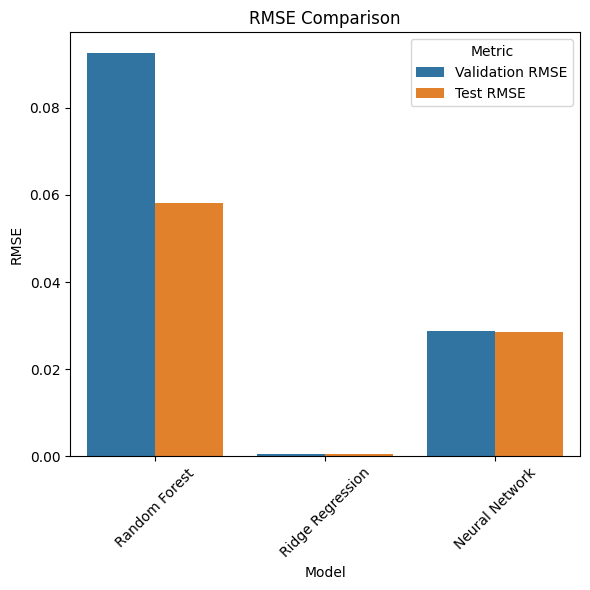

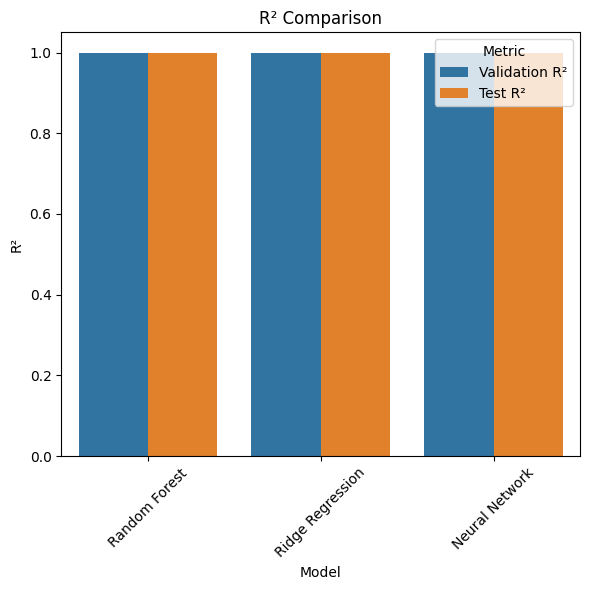

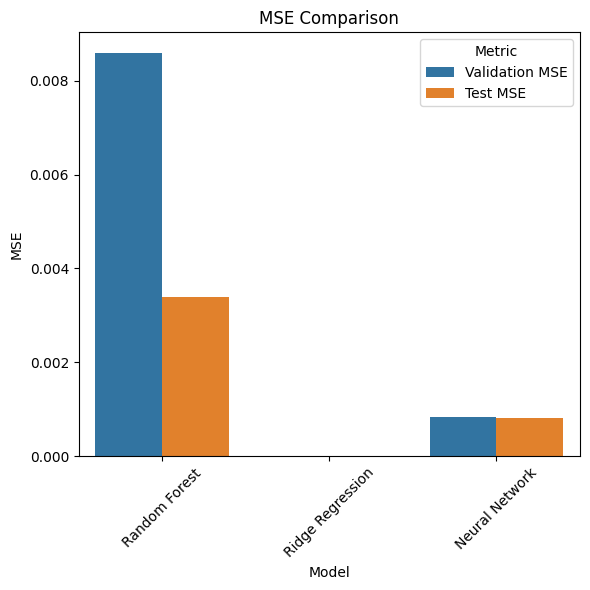

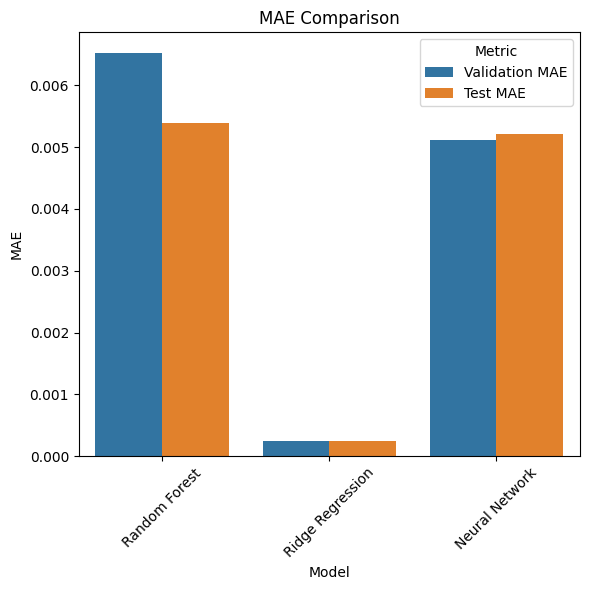

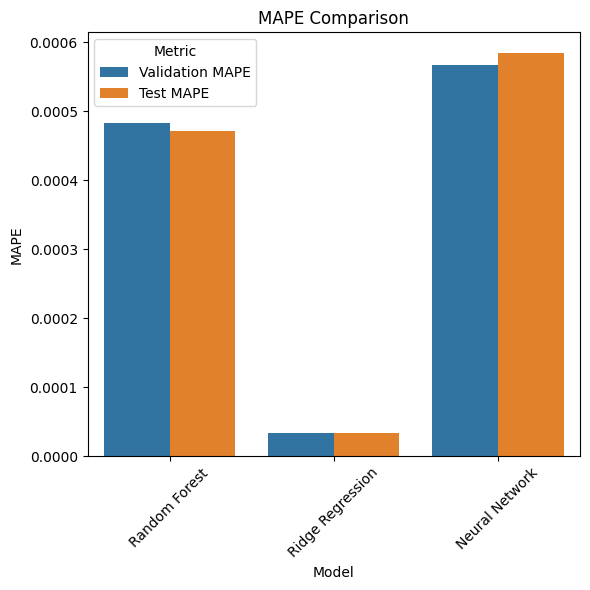

In [42]:
for metric in ["RMSE", "R²", "MSE", "MAE", "MAPE"]:
    plt.figure(figsize=(6, 6))
    sns.barplot(data=result.melt(id_vars="Model", value_vars=[f"Validation {metric}", f"Test {metric}"], var_name="Metric", value_name="Score"),
                x="Model", y="Score", hue="Metric")
    plt.title(f"{metric} Comparison")
    plt.ylabel(f"{metric}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()